### Importing the Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Dataset 

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
training_set = train_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\archive (36)\Cars Dataset\train",
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'categorical')

testing_set = test_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\archive (36)\Cars Dataset\test",
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


### Building the CNN model

In [4]:
# Build the CNN model
cnn = tf.keras.models.Sequential()

# First convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening layer
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer with Dropout
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

# Output layer
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [5]:
#cnn = tf.keras.models.Sequential()

In [6]:
#First convolution layer
#cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64,64,3)))

In [7]:
#First Pooling Layer
#cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [8]:
#Second convolution layer
#cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
#Third convolution layer
#cnn.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = 3, activation = 'relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [10]:
#Flattening layer
#cnn.add(tf.keras.layers.Flatten())

In [11]:
#Dropout Layer
#from keras.layers import Dropout
#cnn.add(Dropout(0.2))  # Dropout rate of 20%


In [12]:
#Fully connected layer
#cnn.add(tf.keras.layers.Dense(units=128, activation = 'relu'))

In [13]:
#Output Layer 
#cnn.add(tf.keras.layers.Dense(units = 7, activation= 'softmax'))

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Building the CNN Model 

In [15]:
history = cnn.fit(x = training_set, validation_data = testing_set, epochs = 20)

Epoch 1/20


105/105 [==============================] - 26s 226ms/step - loss: 1.8444 - accuracy: 0.2691 - val_loss: 1.7211 - val_accuracy: 0.3702
Epoch 2/20
105/105 [==============================] - 23s 215ms/step - loss: 1.7426 - accuracy: 0.3389 - val_loss: 1.6432 - val_accuracy: 0.3887
Epoch 3/20
105/105 [==============================] - 23s 215ms/step - loss: 1.6445 - accuracy: 0.3887 - val_loss: 1.5516 - val_accuracy: 0.4379
Epoch 4/20
105/105 [==============================] - 24s 229ms/step - loss: 1.5031 - accuracy: 0.4555 - val_loss: 1.5408 - val_accuracy: 0.4379
Epoch 5/20
105/105 [==============================] - 23s 216ms/step - loss: 1.3873 - accuracy: 0.4863 - val_loss: 1.3171 - val_accuracy: 0.5412
Epoch 6/20
105/105 [==============================] - 23s 215ms/step - loss: 1.3176 - accuracy: 0.5254 - val_loss: 1.3379 - val_accuracy: 0.5228
Epoch 7/20
105/105 [==============================] - 23s 217ms/step - loss: 1.2200 - accuracy: 0.5701 - val_loss: 1.2760 - val_

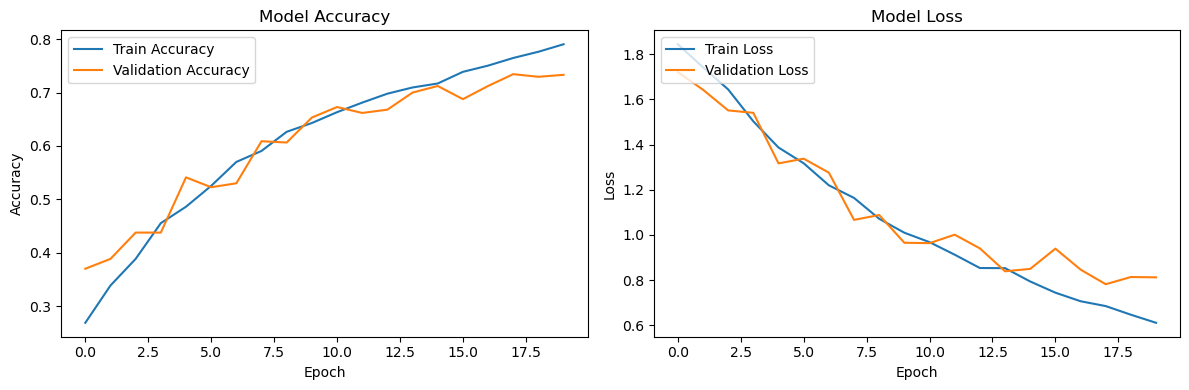

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
# Input an Image to check if the model is working fine or not

import numpy as np 
from keras.preprocessing import image 

img = image.load_img('Cars Dataset/test/Audi/1022.jpg', target_size = (64,64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
# Predict the class
result = cnn.predict(img)

# Define class labels (ensure these match the order used during training)
class_labels = ['AUDI', 'HYUNDAI CRETA', 'MAHINDRA SCORPIO', 'ROLLS ROYCE', 'SWIFT', 'TATA SAFARI', 'TOYOTA INNOVA']

# Find the predicted class index
predicted_class_index = np.argmax(result)

# Get the predicted class label
prediction = class_labels[predicted_class_index]

# Print the prediction
print(f'Predicted class: {prediction}')

1/1 [==============================] - 0s 76ms/step
Predicted class: SWIFT
